# Faint vs bright histogram

In [53]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Calling Gold mask and calculating map area

In [2]:
# calling map 
GoldMask = callingEliGoldMask()
GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

Spatial Cut  530537
Spatial Cut  1003503


##### DES + GOLD catalogs 

In [3]:
# calling gold + des catalog
merged_des_st82 = fitsio.read('result_cat/merged_des_st82_nocut.fits') # in stripe82
merged_des_patch = fitsio.read('result_cat/merged_des_spt_nocut.fits') # spt 0<ra<100, -52<dec<-48
# prior Cut, limit survey depth
#from cmass_modules import Cuts
merged_des_st82_s  = Cuts.doBasicCuts( merged_des_st82 )
merged_des_patch_s = Cuts.doBasicCuts( merged_des_patch )
merged_des_st82_s, _ = priorCut( merged_des_st82_s )
merged_des_patch_s, _ = priorCut( merged_des_patch_s )
#merged_des_st82_s = Cuts._keepGoodRegion(merged_des_st82_s)
#merged_des_patch_s = Cuts._keepGoodRegion( merged_des_patch_s )

6372382 1183 7382
do Basic Cut 2122335
11896527 2265 12385
do Basic Cut 5247727
prior cut  1116939
prior cut  2220010


Check spatial map

In [4]:
#check number density after prior Cut
n_spt = merged_des_patch_s.size * 1./SPTMaparea
n_st82 = merged_des_st82_s.size * 1./ST82Maparea
print 'number density (patch, st82) ', n_spt, n_st82,  '  ',n_spt*1./ n_st82 * 100, '%'

number density (patch, st82)  10796.4820914 10274.4785845    105.08058392 %


divide faint and bright galaxies

In [20]:
# faint >21,  bright <20
bright_st82 = merged_des_st82_s[merged_des_st82_s['MAG_AUTO_R_corrected'] < 20]
faint_st82 = merged_des_st82_s[merged_des_st82_s['MAG_AUTO_R_corrected'] > 20]
bright_spt = merged_des_patch_s[merged_des_patch_s['MAG_AUTO_R_corrected'] < 20]
faint_spt = merged_des_patch_s[merged_des_patch_s['MAG_AUTO_R_corrected'] > 20]
print bright_st82.size, faint_st82.size, bright_spt.size, faint_spt.size

#check number density after prior Cut
n_bright_spt = merged_des_patch_s.size * 1./SPTMaparea
n_bright_st82 = merged_des_st82_s.size * 1./ST82Maparea
n_faint_spt = merged_des_patch_s.size * 1./SPTMaparea
n_faint_st82 = merged_des_st82_s.size * 1./ST82Maparea
print 'number density (patch, st82) ', n_spt, n_st82,  '  ',n_spt*1./ n_st82 * 100, '%'

124951 991977 237393 1982588
number density (patch, st82)  10796.4820914 10274.4785845    105.08058392 %


##### Histogram

writing output plot to: figure/gold_bright_comparison_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_diagnostic_histograms_1d.png
writing output plot to: figure/gold_bright_comparison_NperA_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_NperA_diagnostic_histograms_1d.png


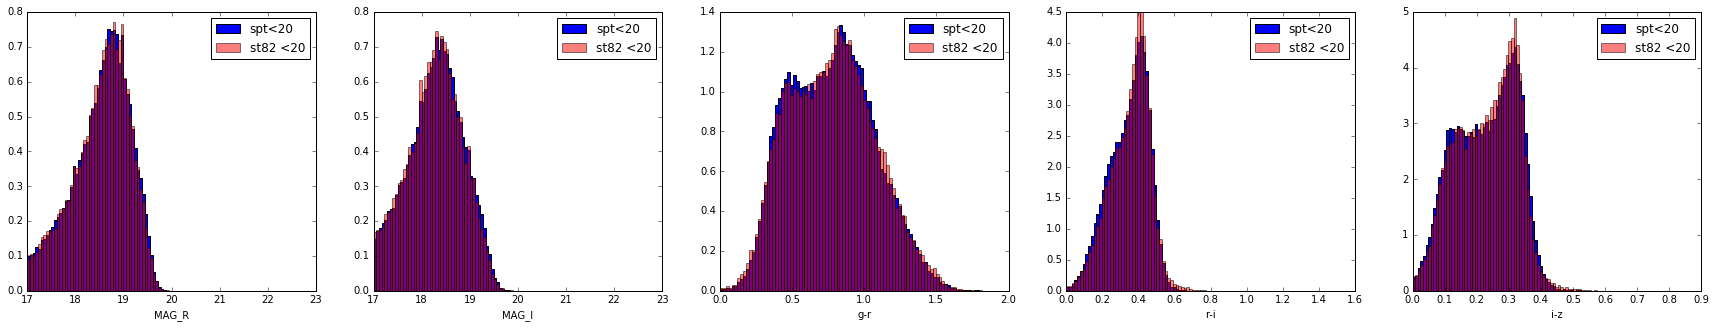

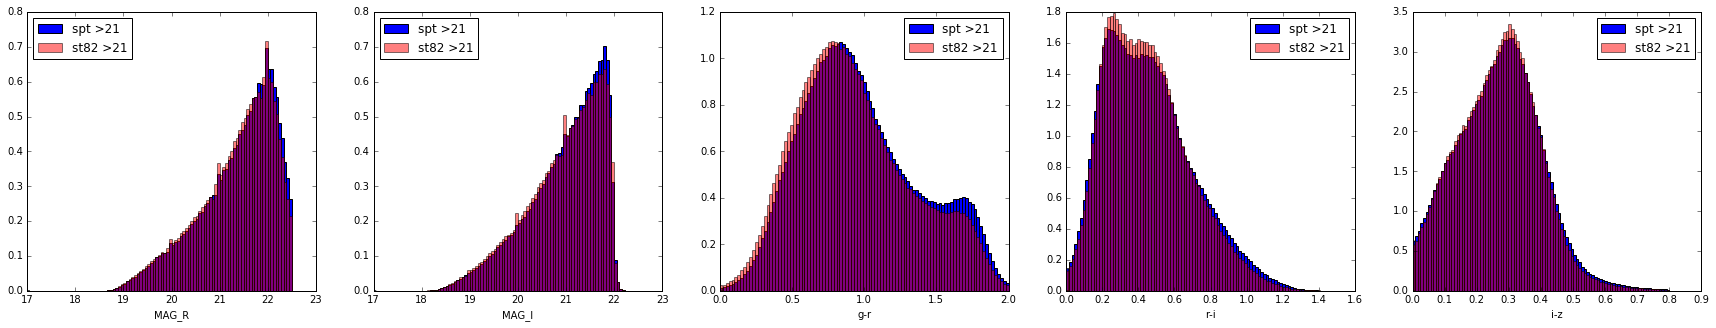

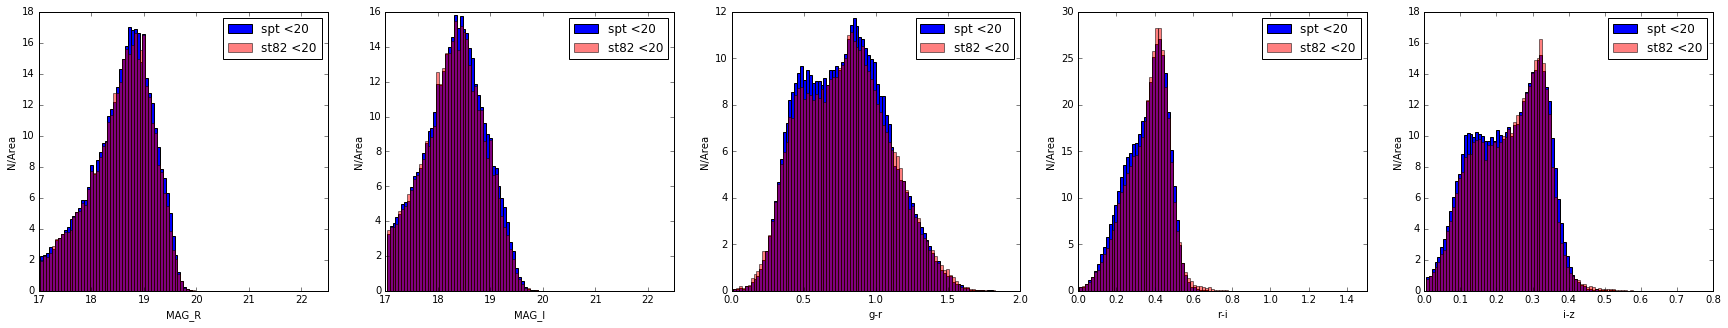

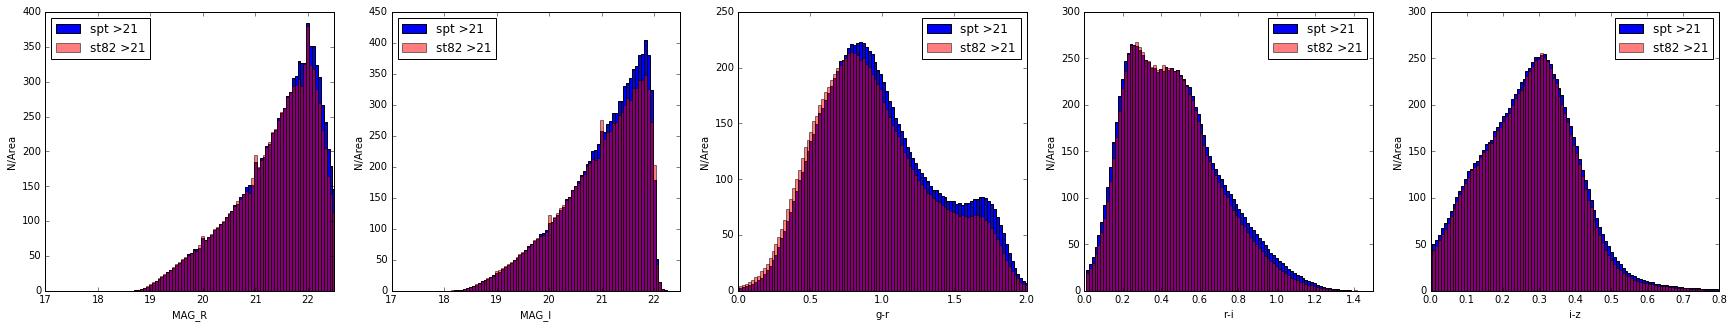

In [18]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.0,2], [-.0,1.5], [0.0,.8]]

X_bright_st82, _ = mixing_color(bright_st82)
X_bright_spt,_ = mixing_color(bright_spt)

X_faint_st82, _ = mixing_color(faint_st82)
X_faint_spt,_ = mixing_color(faint_spt)

doVisualization_1d( X_bright_st82, X_bright_spt, labels = labels, ranges = ranges,\
                         name =['st82 <20','spt<20' ], nbins=100, prefix='gold_bright_comparison_')
doVisualization_1d( X_faint_st82, X_faint_spt, labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_')
doVisualization_1d_NperA( X_bright_st82, X_bright_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 <20','spt <20' ], nbins=100, prefix='gold_bright_comparison_NperA_')
doVisualization_1d_NperA( X_faint_st82, X_faint_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_NperA_')

writing output plot to: figure/gold_bright_comparison_g_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_g_diagnostic_histograms_1d.png
writing output plot to: figure/gold_bright_comparison_NperA_g_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_NperA_g_diagnostic_histograms_1d.png


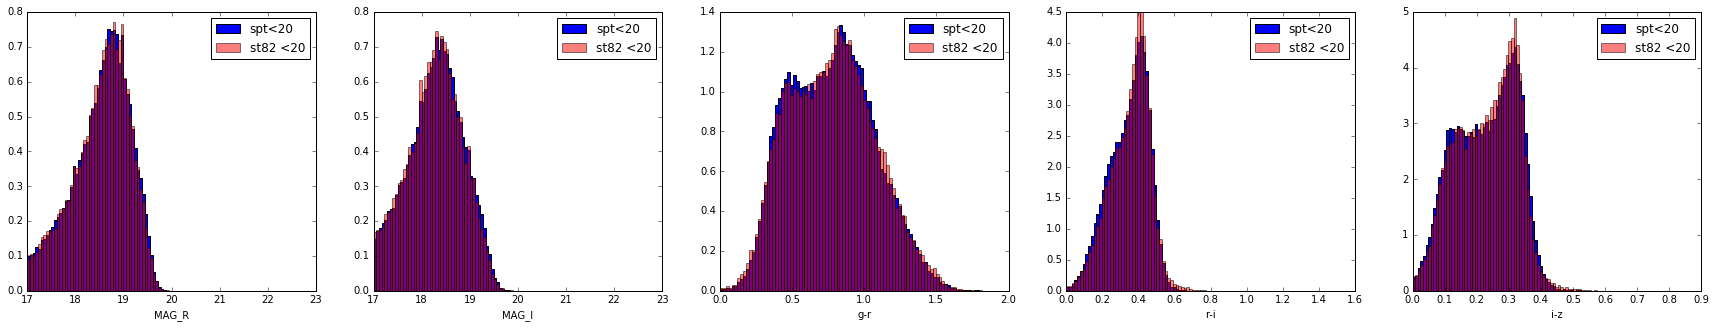

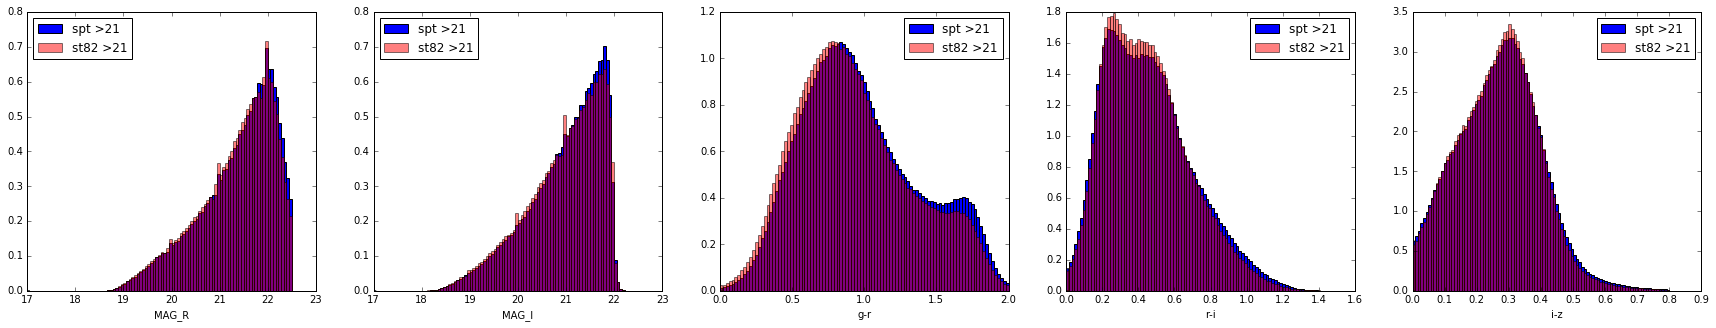

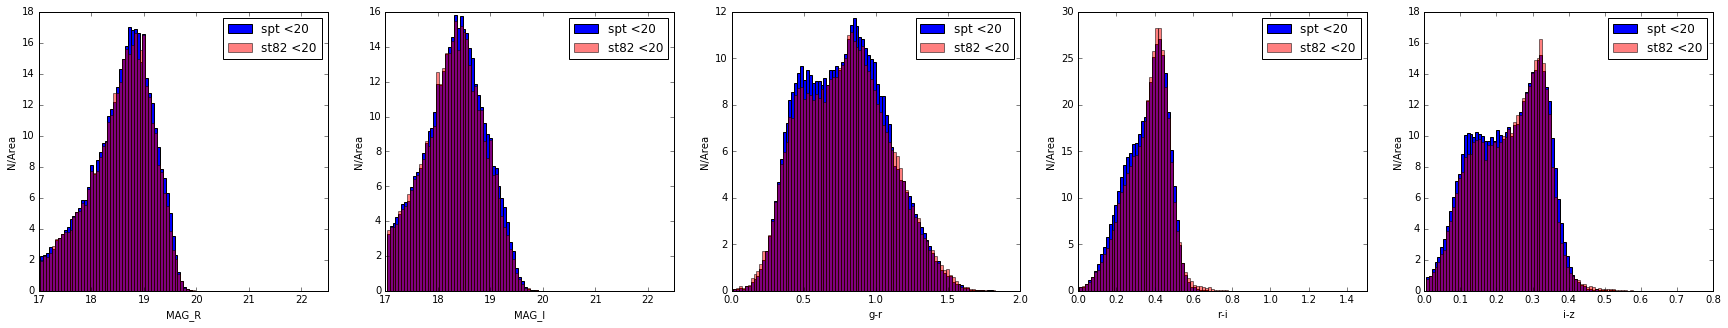

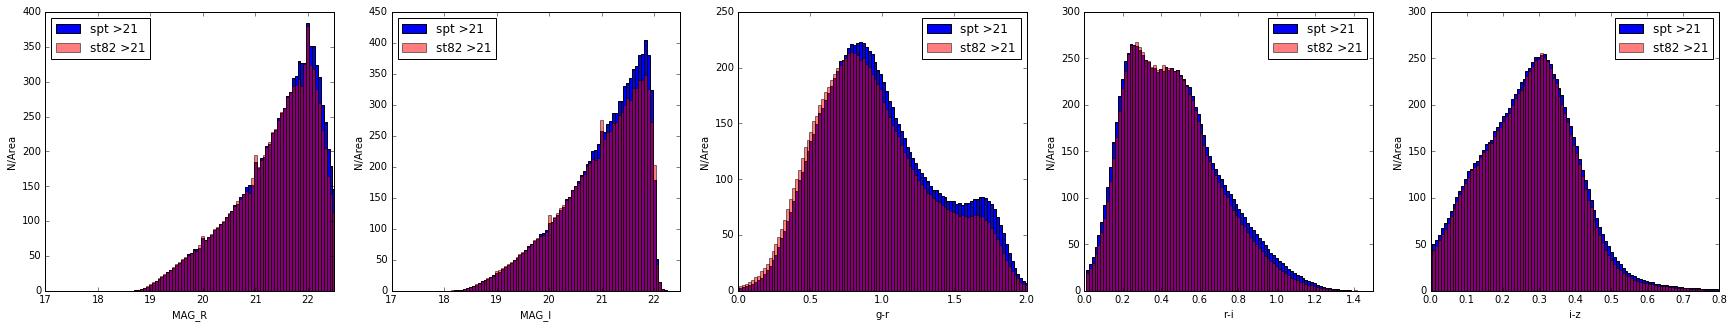

In [19]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.0,2], [-.0,1.5], [0.0,.8]]

X_bright_st82, _ = mixing_color(bright_st82)
X_bright_spt,_ = mixing_color(bright_spt)

X_faint_st82, _ = mixing_color(faint_st82)
X_faint_spt,_ = mixing_color(faint_spt)

doVisualization_1d( X_bright_st82, X_bright_spt, labels = labels, ranges = ranges,\
                         name =['st82 <20','spt<20' ], nbins=100, prefix='gold_bright_comparison_g_')
doVisualization_1d( X_faint_st82, X_faint_spt, labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_g_')
doVisualization_1d_NperA( X_bright_st82, X_bright_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 <20','spt <20' ], nbins=100, prefix='gold_bright_comparison_NperA_g_')
doVisualization_1d_NperA( X_faint_st82, X_faint_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_NperA_g_')

writing output plot to: figure/gold_bright_comparison_r_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_r_diagnostic_histograms_1d.png
writing output plot to: figure/gold_bright_comparison_NperA_r_diagnostic_histograms_1d.png
writing output plot to: figure/gold_faint_comparison_NperA_r_diagnostic_histograms_1d.png


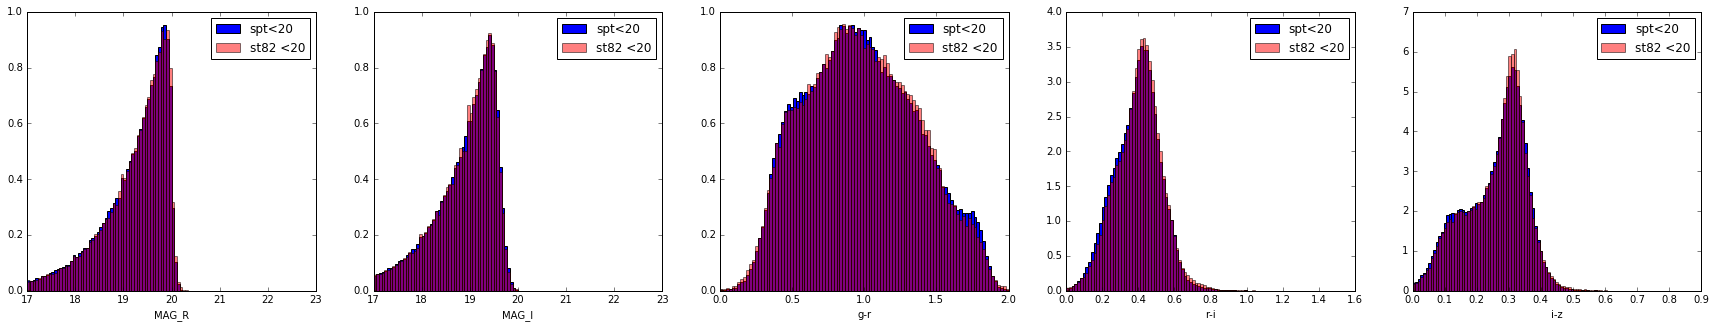

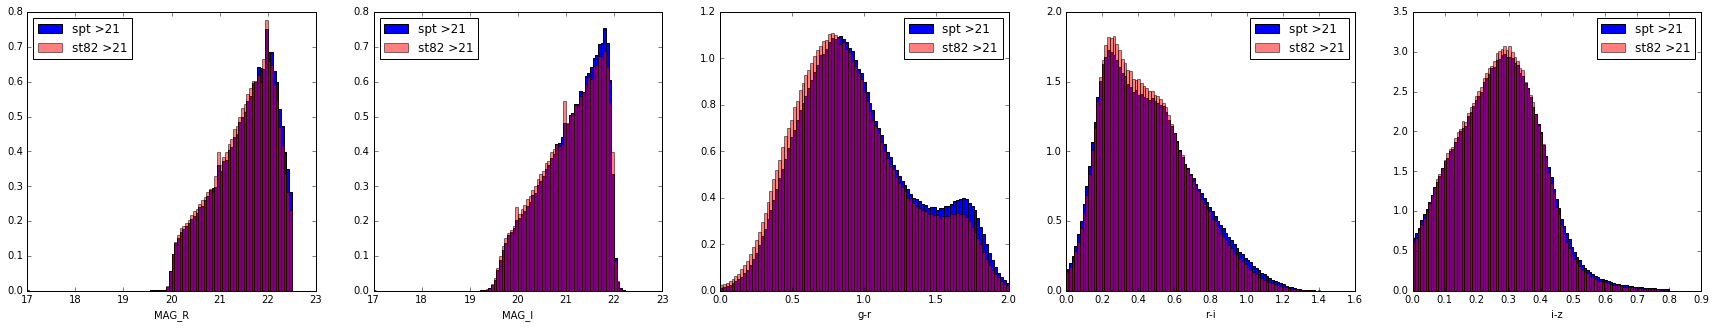

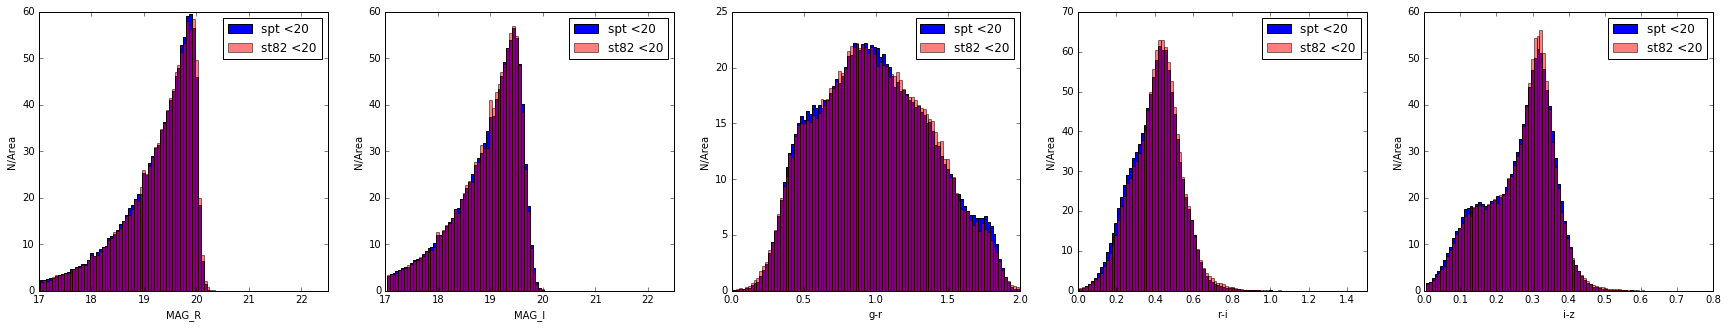

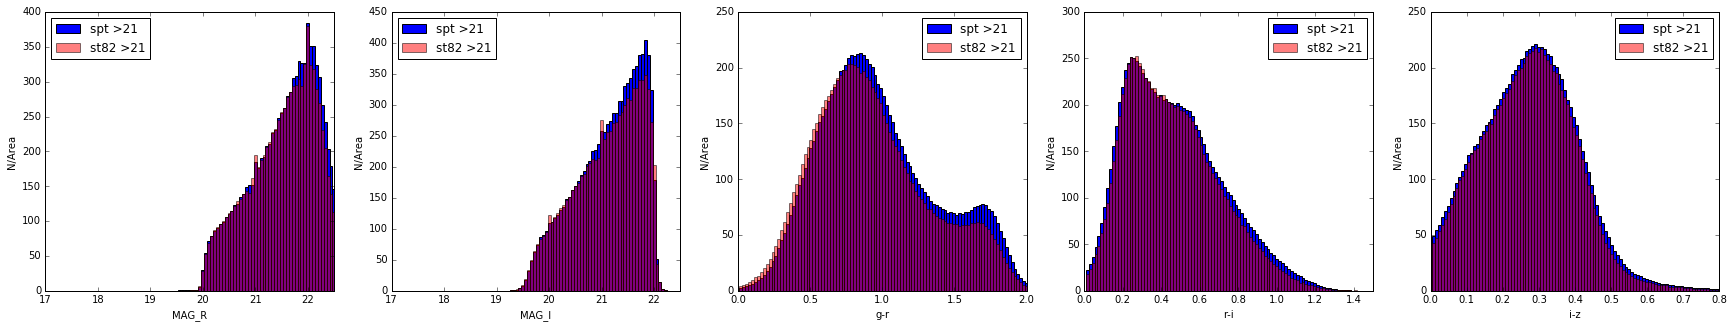

In [21]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.0,2], [-.0,1.5], [0.0,.8]]

X_bright_st82, _ = mixing_color(bright_st82)
X_bright_spt,_ = mixing_color(bright_spt)

X_faint_st82, _ = mixing_color(faint_st82)
X_faint_spt,_ = mixing_color(faint_spt)

doVisualization_1d( X_bright_st82, X_bright_spt, labels = labels, ranges = ranges,\
                         name =['st82 <20','spt<20' ], nbins=100, prefix='gold_bright_comparison_r_')
doVisualization_1d( X_faint_st82, X_faint_spt, labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_r_')
doVisualization_1d_NperA( X_bright_st82, X_bright_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 <20','spt <20' ], nbins=100, prefix='gold_bright_comparison_NperA_r_')
doVisualization_1d_NperA( X_faint_st82, X_faint_spt, area = [ST82Maparea, SPTMaparea], labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='gold_faint_comparison_NperA_r_')

----

## BCC 

In [58]:
#ra, ra2, dec, dec2 = [0, 50, -52, -50]
#ra, ra2, dec, dec2 = [320, 360, -1, 1]
#pix_train = getHealInd_buz(ra, ra2, dec, dec2)

In [57]:
# buz st82 train
pix_train = [ 24,  40,  60,  84, 112, 144, 176]
path = '/n/des/lee.5922/data/buzzard/'
names = []
for p in pix_train:
    names.append(path+'Buzzard_v1.1_Y1A1.'+str(p)+'.fit')   
#buz = np.hstack([fitsio.read(path+'Buzzard_v1.1_Y1A1.40.fit'), fitsio.read(path+'Buzzard_v1.1_Y1A1.60.fit')])
buz = esutil.io.read(names, combine=True)
buz = priorCut_buz(buz)
buz = Cuts.keepGoodRegion(buz)
#train_area = getHPArea(pix = 40) + getHPArea(pix = 60)
train_area = np.sum([getHPArea(pix = p) for p in pix_train])

In [42]:
# buz spt
import esutil

path = '/n/des/lee.5922/data/buzzard/'
pix = [119, 120, 151 ,152 ,153,182, 183 ,184 ,185]

names = []
for p in pix:
    names.append(path+'Buzzard_v1.1_Y1A1.'+str(p)+'.fit')

buz_test = esutil.io.read(names, combine=True)
buz_test = priorCut_buz(buz_test)
buz_test = Cuts.keepGoodRegion(buz_test)
test_area = np.sum([getHPArea(pix = p) for p in pix])

In [60]:
bright_buz = buz[buz['MAG_I']<20]
faint_buz =  buz[buz['MAG_I']>21]
bright_buz_test = buz_test[buz_test['MAG_I']<20]
faint_buz_test =  buz_test[buz_test['MAG_I']>21]

print bright_buz.size, faint_buz.size, bright_buz_test.size, faint_buz_test.size

238426 755342 792252 2498477


writing output plot to: figure/buz_comparison_i_diagnostic_histograms_1d.png
writing output plot to: figure/buz_bright_comparison_i_diagnostic_histograms_1d.png
writing output plot to: figure/buz_faint_comparison_i_diagnostic_histograms_1d.png
writing output plot to: figure/buz_bright_comparison_NperA_i_diagnostic_histograms_1d.png
writing output plot to: figure/buz_faint_comparison_NperA_i_diagnostic_histograms_1d.png


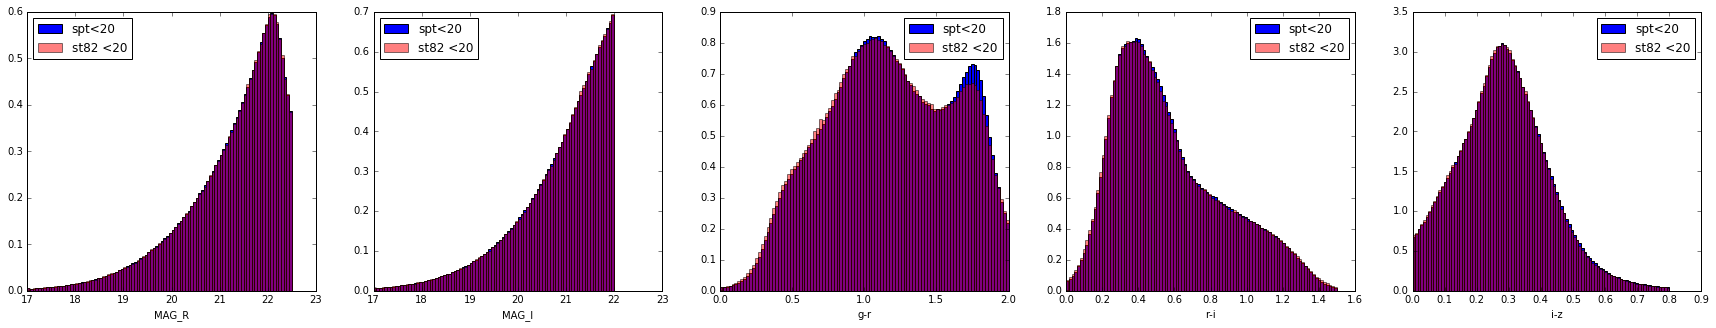

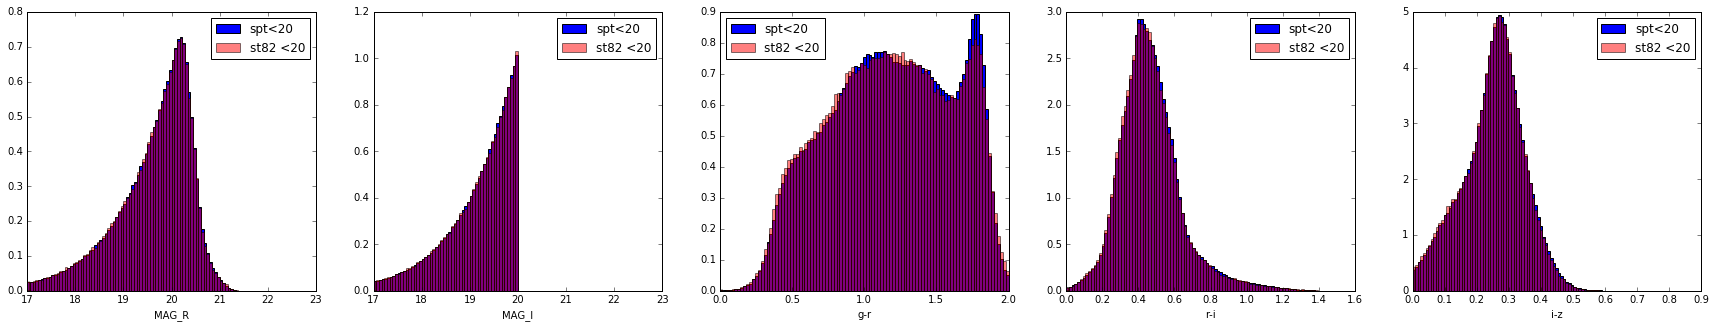

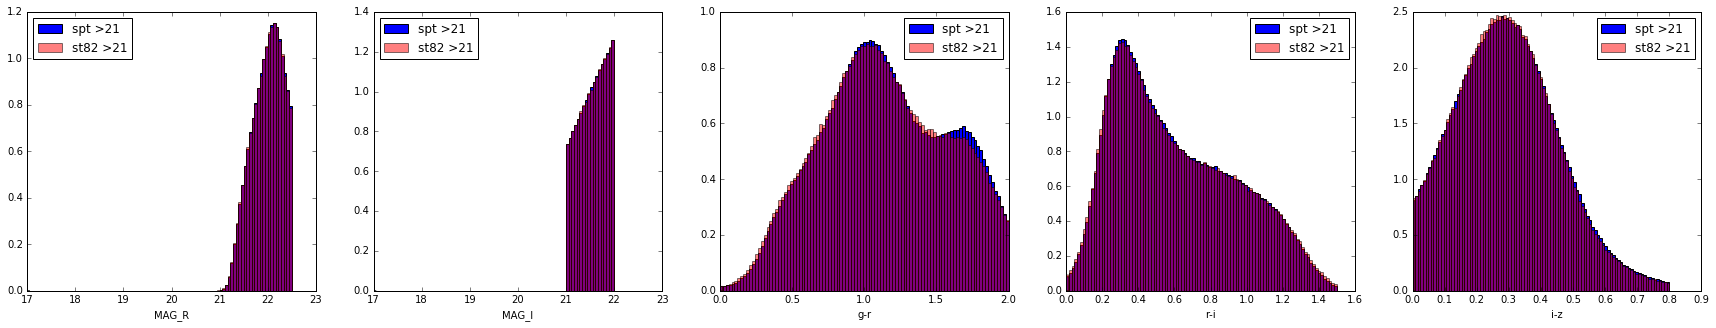

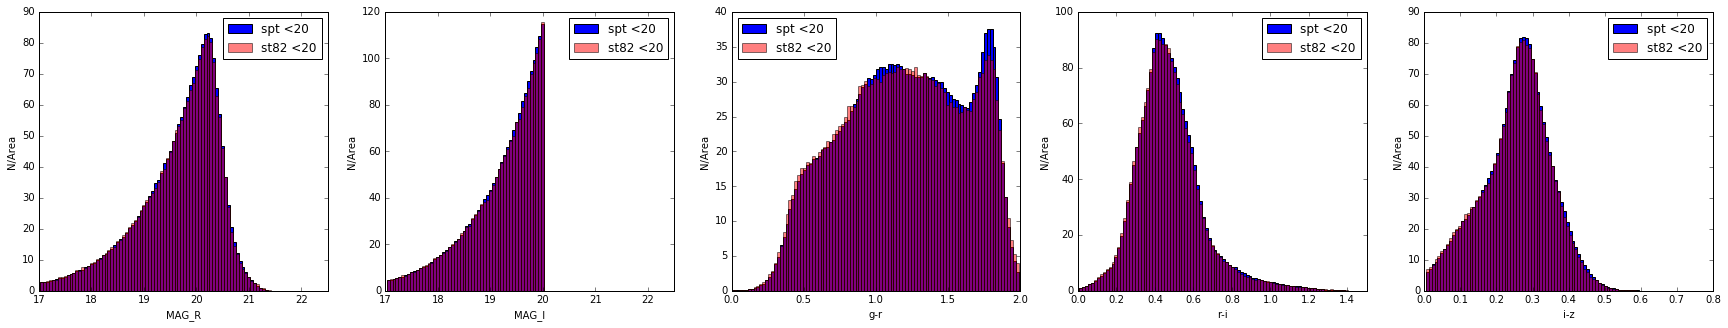

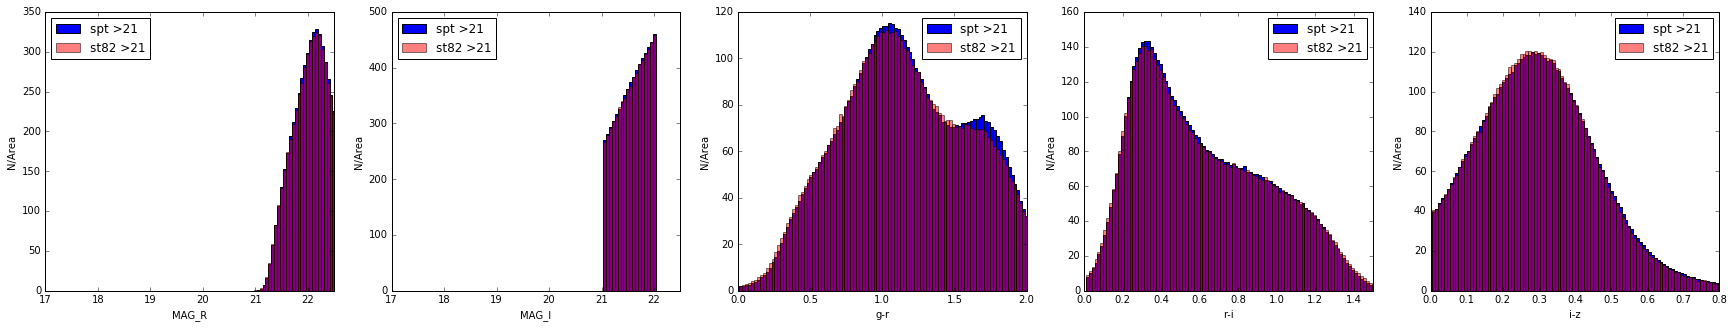

In [61]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.0,2], [-.0,1.5], [0.0,.8]]

X_buz, _ = mixing_color_buz(buz)
X_buz_test,_ = mixing_color_buz(buz_test)
X_bright_buz, _ = mixing_color_buz(bright_buz)
X_bright_buz_test,_ = mixing_color_buz(bright_buz_test)
X_faint_buz, _ = mixing_color_buz(faint_buz)
X_faint_buz_test,_ = mixing_color_buz(faint_buz_test)


doVisualization_1d( X_buz, X_buz_test, labels = labels, ranges = ranges,\
                         name =['st82','spt' ], nbins=100, prefix='buz_comparison_i_')
doVisualization_1d( X_bright_buz, X_bright_buz_test, labels = labels, ranges = ranges,\
                         name =['st82 <20','spt<20' ], nbins=100, prefix='buz_bright_comparison_i_')
doVisualization_1d( X_faint_buz, X_faint_buz_test, labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='buz_faint_comparison_i_')
doVisualization_1d_NperA( X_bright_buz, X_bright_buz_test, area = [train_area, test_area], labels = labels, ranges = ranges,\
                         name =['st82 <20','spt <20' ], nbins=100, prefix='buz_bright_comparison_NperA_i_')
doVisualization_1d_NperA( X_faint_buz, X_faint_buz_test, area = [train_area, test_area], labels = labels, ranges = ranges,\
                         name =['st82 >21','spt >21' ], nbins=100, prefix='buz_faint_comparison_NperA_i_')

BCC SPT uniformly higher than ST82 near 1.7 in g-r plane

----